# Monte Carlo Simulation in Python – Simulating a Random Walk

Wikipedia states “Monte Carlo methods (or Monte Carlo experiments) are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. Their essential idea is using randomness to solve problems that might be deterministic in principle. They are often used in physical and mathematical problems and are most useful when it is difficult or impossible to use other approaches. Monte Carlo methods are mainly used in three distinct problem classes:[1] optimization, numerical integration, and generating draws from a probability distribution.”



We will be using a Monte Carlo simulation to look at the potential evolution of asset prices over time, assuming they are subject to daily returns that follow a normal distribution (n.b. as we know, asset price returns usually follow a distribution that is more leptokurtic (fat tailed) than a normal distribution, but a normal distribution is often assumed for these kind of purposes). This type of price evolution is also known as a “random walk”.

If we want to buy a particular stock, for example, we may like to try to look into the future and attempt to predict what kind of returns we can expect with what kind of probability, or we may be interested in investigating what potential extreme outcomes we may experience and how exposed we are to the risk of ruin or, on the flip side, superior returns.

To set up our simulation, we need to estimate the expected level of return (mu) and volatility (vol) of the stock in question. This data can be estimated from historic prices, with the simplest methods just assuming past mean return and volatility levels will continue into the future. One could also adjust historic data to account for investor views or market regime changes etc, however to keep things simple and concentrate on the code we will just set simple return and volatility levels based on past price data.

In [4]:

#import necessary packages
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data
 
#download Apple price data into DataFrame
apple = data.DataReader('AAPL', 'yahoo',start='1/1/2000')
 
#calculate the compound annual growth rate (CAGR) which 
#will give us our mean return input (mu) 
days = (apple.index[-1] - apple.index[0]).days
cagr = ((((apple['Adj Close'][-1]) / apple['Adj Close'][1])) ** (365.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr
 
#create a series of percentage returns and calculate 
#the annual volatility of returns
apple['Returns'] = apple['Adj Close'].pct_change()
vol = apple['Returns'].std()*np.sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

CAGR = 25.259999999999998%
Annual Volatility = 40.949999999999996%


Now we know our mean return input (mu) and our volatility input (vol) – the code to actually run the Monte Carlo simulation is as follows:

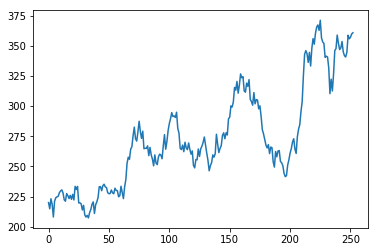

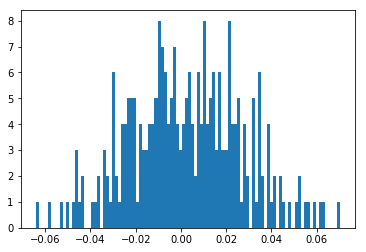

In [5]:

#Define Variables
S = apple['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.4259 #Volatility
 
#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1
 
#set starting price and create price series generated by above random daily returns
price_list = [S]
 
for x in daily_returns:
    price_list.append(price_list[-1]*x)
 
#Generate Plots - price series and histogram of daily returns
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

The above code basically ran a single simulation of potential price series evolution over a trading year (252 days), based upon a draw of random daily returns that follow a normal distribution. This is represented by the single line series shown in the first chart. The second chart plots a histogram of those random daily returns over the year period.

We have managed to successfully simulate a year’s worth of future daily price data. This is fantastic and all, but really it doesn’t afford us much insight into risk and return characteristics of the stock as we only have one randomly generated path. The likelyhood of the actual price evolving exactly as described in the above charts is pretty much zero.

So what’s the point of this simulation you may ask? Well, the real insight is gained from running thousands, tens of thousands or even hundreds of thousands of simulations, with each run producing a different series of potential price evolution based upon the same stock characteristics (mu and vol).

We can very simply adjust the above code to run multiple simulations. This code is presented below. In the below code you will notice a couple of things – firstly I have removed the histogram plot (we’ll come back to this in a slightly different way later), and also the code now plots multiple price series on one chart to show info for each separate run of the simulation.

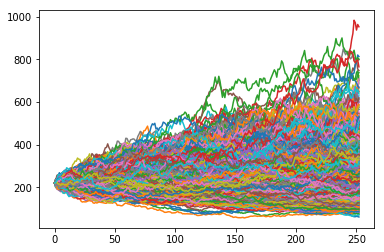

In [6]:

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
 
#Define Variables
S = apple['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.4259 #Volatility
 
#choose number of runs to simulate - I have chosen 1000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
 
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
 
#show the plot of multiple price series created above
plt.show()

Now we can see the potential outcomes generated from 1000 different simulations, all based on the same basic inputs, allowing for the randomness of the daily return series.

In it’s current format, with the chart being so full of data it can be a little difficult to actually see clearly what is going on – so this is where we come back to the histogram that we removed before, albeit this time it will show us the distribution of ending simulation values, rather than the distribution of daily returns for an individual simulation. I have also simulated 10,000 runs this time to give us more data.

Again, the code is easily adapted to include this histogram.

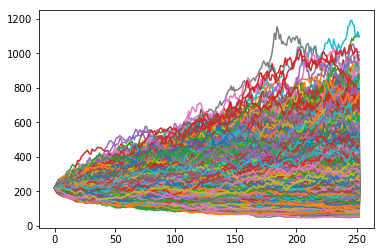

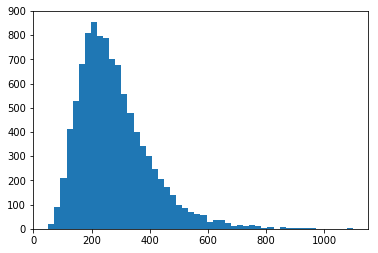

In [7]:

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
 
#set up empty list to hold our ending values for each simulated price series
result = []
 
#Define Variables
S = apple['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.4259 #Volatility
 
#choose number of runs to simulate - I have chosen 10,000
for i in range(10000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
 
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])
 
#show the plot of multiple price series created above
plt.show()
 
#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50)
plt.show()

We can now quickly calculate the mean of the distribution to get our “expected value”:

In [11]:
#use numpy mean function to calculate the mean of the result
print(round(np.mean(result),2))

278.26


Of course you will get a slightly different result due to the fact that these are simulations of random daily return draws. The more paths or “runs” you include in each simulation, the more the mean value will tend towards the mean return we used as our “mu” input. This is as a result of the law of large numbers.

We can also take a look at a couple of “quantiles” of the potential price distribution, to get an idea of the likelyhood of very high or very low returns.

We can just use the numpy “percentile” function as follows to calculate the 5% and 95% quantiles:

In [12]:
print("5% quantile =",np.percentile(result,5))
print("95% quantile =",np.percentile(result,95))

5% quantile = 124.58886812943939
95% quantile = 509.51950298111086


So now we can begin to ask ourselves questions along the lines of am I willing to risk a 5% chance of ending up with a stock worth less than 124.58, in order to chase an expected return of around 25.259% , giving us an expected stock price of around 278.26?

I think the last thing to do is to quickly plot the two quantiles we have just calculated on the histogram to give us a visual representation 

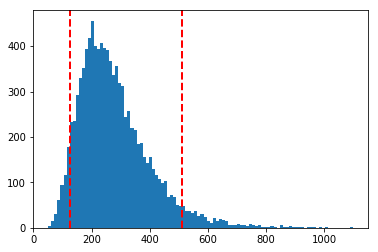

In [9]:

plt.hist(result,bins=100)
plt.axvline(np.percentile(result,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(result,95), color='r', linestyle='dashed', linewidth=2)
plt.show()